In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

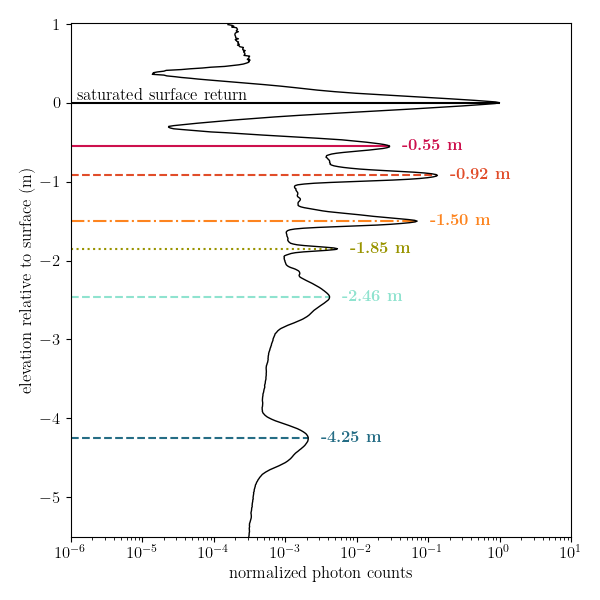

In [6]:
df = pd.read_csv('data/saturation_counts_alldata.csv')

plt.rcParams.update({
    'font.size': 12,
    'text.usetex': True,
    'font.family': 'Optima'
})

thresh_upper = 1.005
thresh_lower = -5.505

peak_target_elevs = [0.0, -0.55, -0.92, -1.50, -1.85, -2.46, -4.25]
widths_pk = [0.0, 0.3, 0.225, 0.225, 0.225, 0.35, 0.3]
cols_pk = ['black','#CD104D', '#E14D2A', '#FD841F', '#999400', '#8FE3CF', '#256D85']
lsty_pk = ['-', '-', '--', '-.', ':', '--', '--']

# for j, beam_select in enumerate(['all', 'strong', 'weak'] + list(np.arange(1,7))):
for j, beam_select in enumerate(['all']):
    fig, ax = plt.subplots(figsize=[6, 6], dpi=100)
    ylms = (thresh_lower, thresh_upper)
    xlim_ax = (1e-6,10)

    vals = df['smooth_%s'%beam_select]
    ax.plot(vals, df.elev_bins, 'k-', lw=1)
    for i in range(len(peak_target_elevs)):
        thish = peak_target_elevs[i]
        thispeak_height = vals.iloc[np.argmin(np.abs(df.elev_bins-thish))]
        ax.plot([xlim_ax[0], thispeak_height], [thish]*2, color=cols_pk[i], ls=lsty_pk[i], zorder=-1000,solid_capstyle='butt')
        if i == 0:
            ax.text(1.2*xlim_ax[0], thish, 'saturated surface return', color=cols_pk[i], ha='left', va='bottom')
        else:
            ax.text(thispeak_height*1.5, thish, r'\textbf{%.2f m}' % thish, color=cols_pk[i], weight='bold', va='center')

    if type(beam_select) == str:
        tit = '%s beams' % beam_select
    else:
        tit = 'beam %i' % beam_select
    if j != 0:
        ax.set_title(tit)
    
    ax.set_xlabel('normalized photon counts')
    ax.set_ylabel('elevation relative to surface (m)')
    ax.set_xlim(xlim_ax)
    ax.set_ylim(ylms)
    ax.set_xscale('log')
    
    fig.tight_layout()
    
    plt.savefig('plots/saturation_counts_beams_%s.jpg' % beam_select, dpi=600)